In [1]:
%run Jansen_And_Rit.py

In [2]:
%run OptimiseFunctions.py

In [3]:
#x1, x2, x3, V_T_sim = run_jansen_and_rit(10,10,94,101,35,10,0.367,1,0.66,0,0.5)
x1, x2, x3, V_T_sim = run_jansen_and_rit_with_caching(3.25,22,135,100,50,50,0.56,0.56,0.56,0,0)

In [461]:
leadfield = scipy.io.loadmat('reshaped_leadfield.mat')
leadfield = leadfield['leadfield'] # Shape (100, 62, 3)
# leadfield = np.linalg.norm(leadfield, axis=-1).T
leadfield = np.sum(leadfield, axis=-1).T #(62, 100)

row_sums = np.zeros(62)
for i in range(62):
    row_sums[i] = np.sum(leadfield[i])

for i in range(62): # (100, )
    leadfield[i] = leadfield[i] / row_sums[i]
    
# Verify that the sum of each row is 1
print(np.allclose(leadfield.sum(axis=1), 1))

(100,)
True


In [514]:
np.sum(leadfield[0])

0.9999999999999998

In [519]:
np.sum(V_T_sim[4])

-429.80032559468845

In [512]:
# for 62_node 1, at time 0 

total += V_T_sim[0][i] * leadfield[0]

print(total)

[-18.36507361  -3.92495561  -7.52466916  -4.31231224  -2.14475848
  -5.32529457  -8.31045748  -5.34744279  -3.3189441  -20.13955377
 -15.27705646 -22.13456458 -19.74065063 -10.66433587   1.2656557
  -9.94507828 -17.48480695  -8.63656136 -11.73944653  -3.01230775
  -5.72419778 -20.33504726  -5.71742298 -18.92930504 -24.69405594
 -24.87105229  -5.65164165  -3.57212078  -4.65500451  -0.91314541
 -19.65497504 -12.01375099 -28.71442557 -10.42454274 -22.72876652
  -5.33526007  -4.44802002 -25.24713223 -19.59341121 -13.32646325
 -11.05398635 -33.33393719 -36.2723412   -4.39439773 -27.34058256
  10.37096268 -12.08670019  -6.35369852  -6.34874043  -4.23646858
  -6.49025358   0.64668348   5.87411202   4.453966    -0.89057111
  -0.75929966   3.55953212   0.80888337   3.83937495   2.91617228
   5.18444397   9.60300452  10.53555873   9.20081545   4.78506476
   3.61349553   8.5176671   10.82982722   5.72256418   3.35112051
   3.65222982   5.98153342   9.67892213   9.90538171  12.42043986
  -2.139528

In [491]:
for i in range(5):
    # leadfield[i] will be (100, ) - i.e. the percentage each of the 100 nodes affect that 62_node
    print(leadfield.shape) # (62, 100)
    print(np.sum(leadfield[i]))

    

(62, 100)
0.9999999999999998
(62, 100)
0.9999999999999999
(62, 100)
0.9999999999999999
(62, 100)
1.0
(62, 100)
1.0


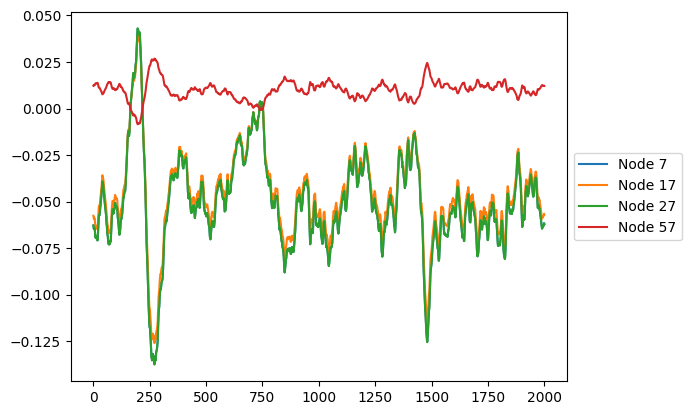

In [373]:
x = range(1, 2001)
final = np.zeros((62, 2000))

for t in range(2000):
    for i in range(8):
        # print((V_T_sim.T[i][0] * leadfield.T[i]).shape) # (62, )
        # print(V_T_sim.T[i][0] * leadfield.T[i])
        final.T[t] = V_T_sim.T[i][t] * leadfield.T[i] # taken value of one node at time point 0, multiplied by vector of its influence on 62 

for i in range(62):
    if (i == 7 or i == 17 or i == 27  or i == 57):
        plt.plot(x, final[i], label=f'Node {i}')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();


In [263]:
node_vals= np.zeros((62, 500))
V_T_sim = C2 * x1[-2000:] - C4 * x2[-2000:]+ C * alpha * x3[-2000:]

V_T_sim

for t in range(1):
    for s_node in range(1):
        for h_node in range(100):
            print(leadfield[s_node][h_node] * V_T_sim.T[h_node][t])
            node_vals[s_node][t] += leadfield[s_node][h_node] * V_T_sim.T[h_node][t]

-0.03483913542167667
-0.023190785894595403
-0.0408222201355167
-0.03459586722872973
-0.02818857198503877
-0.022835086654089874
-0.03653017530035897
-0.032000188422899145
-0.02999306100237385
-0.029672909584232552
-0.0478883138621753
-0.04722442170164081
-0.04778526684434228
-0.0449485338015311
-0.03305825117166921
-0.033115525398465864
-0.0512517604912649
-0.03910817756570287
-0.019890105528808585
-0.02638155491720543
-0.012995361073429336
-0.04708761177432386
-0.04447459494703484
-0.04410531852540632
-0.032216859547200535
-0.07834278297899425
-0.06706509161080905
-0.06615247569838306
-0.036204912239471906
-0.047744658016151104
-0.060044895785858254
-0.050745854950971864
-0.048012917495679465
-0.037366812077387346
-0.07862796502647611
-0.024114397604373086
-0.04196402123235642
-0.051177193719666655
-0.04668516199306877
-0.03638517824788125
-0.0374686324015968
-0.06817962195034308
-0.09604062084536953
-0.061044044780050884
-0.16107486723028036
-0.044964541235094385
-0.03593037462243474


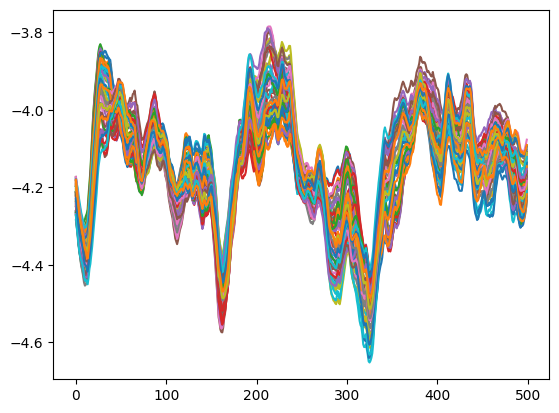

In [262]:
x = range(0, 500)
plt.plot(x, node_vals.T);

In [5]:
ch_names = ['CH{}'.format(i) for i in range(62)]
# Create info dictionary

fake_info = mne.create_info(ch_names, sfreq=eeg_freq)
raw = mne.io.RawArray(data=V_T_sim.T, info=fake_info)

plt.switch_backend('QtAgg')

fig = raw.plot(scalings=10)

Creating RawArray with float64 data, n_channels=62, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Using matplotlib as 2D backend.


: 

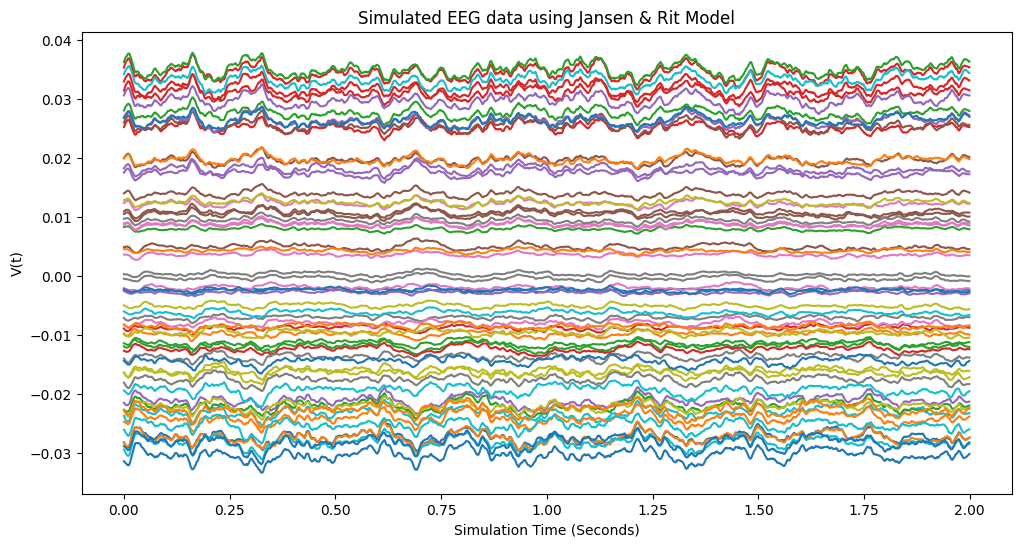

In [4]:
%matplotlib inline
# Plot EEG Results #################################################################
fig = plt.figure(figsize=(12, 6)) 

time_seconds = np.arange(V_T_sim.shape[0]) / eeg_freq

# Plot V_T for each node
for node in range(62):
    plt.plot(time_seconds, V_T_sim[:, node], label=f'Node {node+1}')

plt.xlabel('Simulation Time (Seconds)')
plt.ylabel('V(t)')
plt.title('Simulated EEG data using Jansen & Rit Model')

# Add legend to the right of the plot
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
plt.close(fig)

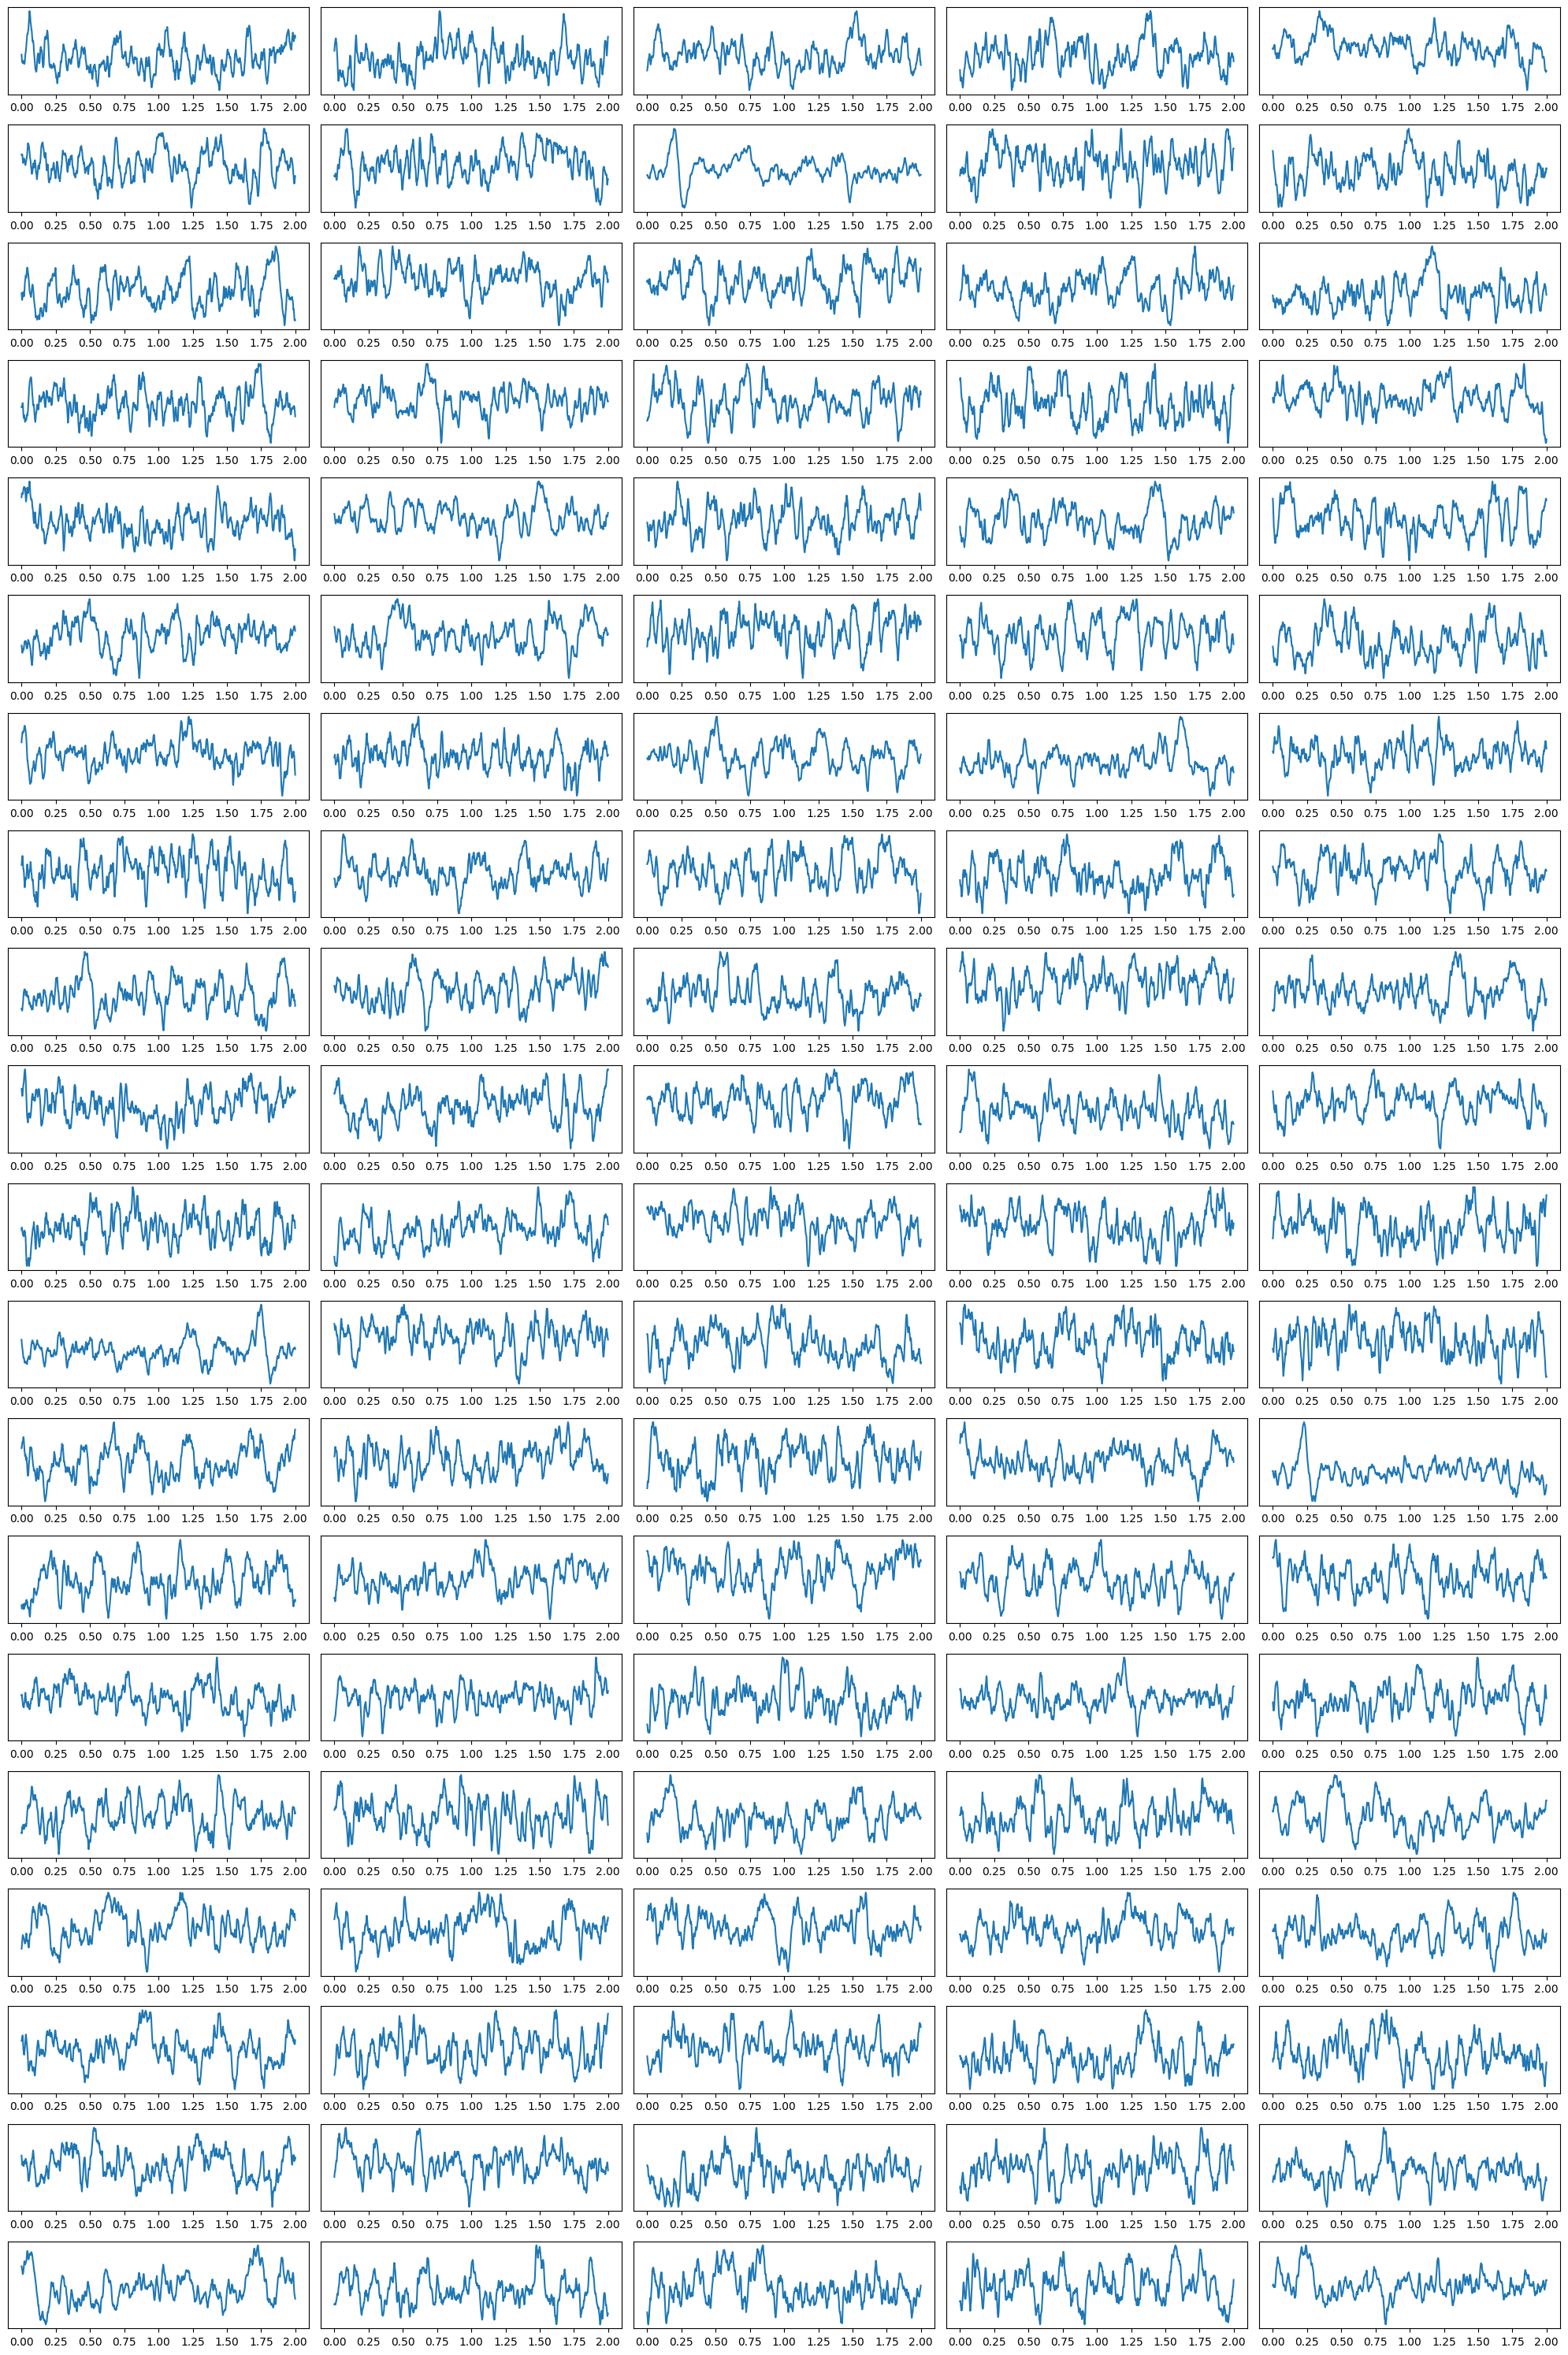

In [139]:
fig, ax = plt.subplots(nrows=20, ncols=5, figsize=(20, 30))

node = 0
for row in ax:
    for col in row:
        col.plot(time_seconds,  V_T_sim[:, node])
        col.tick_params(left=False, labelleft=False)
        node += 1 
    plt.tight_layout()

plt.show()
plt.close(fig)